##### This notebook is created as a homework submission for Data Science Programing Course offered at The University of Texas at Austin by the McCombs School of Business as a summer core for MS Business Analytics

#### Prompt
We will analyze restaurant inspections in New York City, starting November
1, 2014 and ending January 31, 2015. The data is in the file NYC Restaurants.csv.
Setup First, read in this data using:
• df = pd.read csv(’NYC Restaurants.csv’, dtype=str).
This ensures that all fields are read in as strings, and loading the data is relatively fast.

In [1]:
import pandas as pd
df = pd.read_csv("NYC_Restaurants.csv", dtype = str, index_col = [0])
df.head(3)

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,12/30/2014,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,8,A,12/30/2014,02/12/2015,Cycle Inspection / Re-inspection
1,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,12/30/2014,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,8,A,12/30/2014,02/12/2015,Cycle Inspection / Re-inspection
2,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,11/13/2014,Violations were cited in the following area(s).,04H,"Raw, cooked or prepared food is adulterated, c...",Critical,16,NaN,NaN,02/12/2015,Cycle Inspection / Initial Inspection


#### Task 1: Create a unique name for each restaurant. 
On the DataFrame created above, add a new column to your DataFrame, called ’RESTAURANT’, that combines DBA, BUILDING, STREET, ZIPCODE, and BORO fields. For example, “WENDY’S 469 FLATBUSH AVENUE 11225 BROOKLYN”. Print the first 10 values of the RESTAURANT column of your DataFrame.

In [2]:
# Combining columns to make the final 'RESTAURANT' column

df['RESTAURANT'] = df['DBA'] + " " + df['BUILDING'] + " " + df[
                                'STREET'] + " " + df['ZIPCODE'] + " " + df['BORO']

df[['RESTAURANT']][:10]

,RESTAURANT
0,WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
1,WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
2,WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
3,WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
4,WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
5,TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
6,TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
7,TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
8,TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
9,BRUNOS ON THE BOULEVARD 8825 ASTORIA BOULEVARD...


#### Task 2: How many restaurants are included in the data?
Careful now:
• A “Subway” in one particular address (i.e., building, street, zipcode, and boro) counts as one restaurant; don’t combine all Subways into one restaurant!
• The data can have multiple violations for the same restaurant!

In [3]:
# As there are multiple enteries for every restaurant, we need to take unique
df['RESTAURANT'].nunique()

10114

#### Task 3: How many chains are there? 
Let us define a chain to be the same restaurant name occurring in at least two different (building, street, zipcode, boro) addresses (i.e., one DBA with multiple restaurant locations).
You’ll see multiple versions of the name ”DUNKIN DONUTS”. Just act as if they are different chains.

In [4]:
# Generating a list of unique Restaurants along with the respective DBA 
# column and getting the count for each DBA

chains = df.drop_duplicates('RESTAURANT')['DBA'].value_counts()
len(chains[chains>1])

368

#### Task 4: Plot a bar graph of the top 20 most popular chains.
We already have the chains from the previous problem. Count the number of restaurants for each chain as a measure of its popularity.

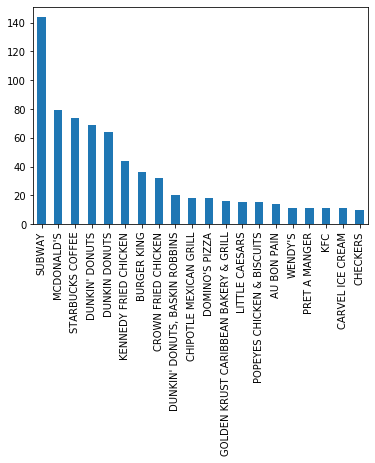

In [5]:
# Plotting the top 20 chains

chains[chains>1][:20].plot(kind = "bar")

#### Task 5: What fraction of all restaurants are chain restaurants? 
You should think of a restaurant as being one restaurant at one location. So “Wendy’s 5th Street” and “Wendy’s on 10th Street” are two different restaurants. Essentially a restaurant is what you defined in Q1.

In [6]:
chains[chains>1].values.sum()/df['RESTAURANT'].nunique()

# Numerator is the number of unique chain restaurants & denominator is the unique restaurants

0.16472216729286138

#### Task 6: Plot the number of non-chain restaurants in each
boro. First, we need to figure out all the non-chain restaurants, then select out only those restaurants, and finally plot the number of such restaurants by boro. Make sure to look at the plot; we don’t want to see... oh... the “missing” boro.

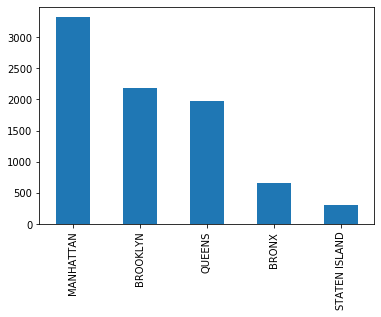

In [7]:
# Taking the non chain restaurants with chain = 1 i.e. no chain
new = chains[chains==1]

# Function to check if given restaurant is non-chain
def finder_non_chain_restaurant(x):
    return x in new

# Mask to check if list of restaurants are non-chain
mask = list(map(finder_non_chain_restaurant, df['DBA']))
non_chain_restaurant_by_boro = df[mask][['RESTAURANT', 'DBA', 'BORO']].drop_duplicates()

# Finding the missing
mask2 = non_chain_restaurant_by_boro['BORO'] != 'Missing'

non_chain_restaurant_by_boro_count = non_chain_restaurant_by_boro[mask2]['BORO'].value_counts()
non_chain_restaurant_by_boro_count.plot.bar()

#### Task 7: Plot the fraction of non-chain restaurants in each boro. 
The boro with the most non-chain restaurants might just be the boro with the most restaurants in general. If we want to find the boro that attracts the most “independent” restauranteurs, we must divide the number of non-chain restaurants by the total number of restaurants in the boro. Plot this.
Is the boro with the most independent restaurants also the one with the highest ratio of independent restaurants?

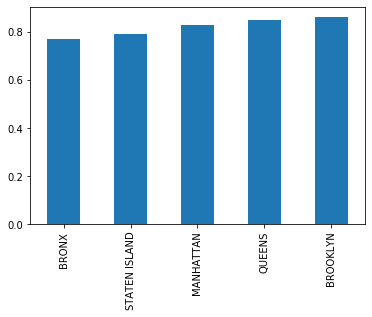

In [8]:
total = df[df.BORO != "Missing"].drop_duplicates('RESTAURANT')['BORO'].value_counts()
(non_chain_restaurant_by_boro_count/total).sort_values().plot(kind = "bar")

# Numerator is non-chain by boro and denominator is the total restaurants by boro

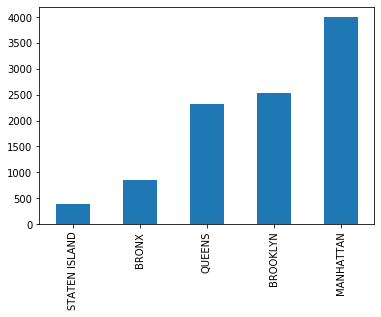

In [9]:
# Plot for total restaurants by boro

total[total.index != "Missing"].sort_values().plot(kind = "bar")

#### NOTE

Boro with the most number of independent restaurants = Manhattan

Boro with the highest ratio of independent restaurants = Brooklyn

Clearly, the boro with the most independent restaurants is **not** the one with the highest ratio of independent restaurants


#### Task 8: Plot the popularity of cuisines. 
Which cuisines are the most well-represented among all restaurants? Define the popularity of a cuisine as the number of restaurants serving that cuisine. Plot the popularity of the top 20 cuisines.

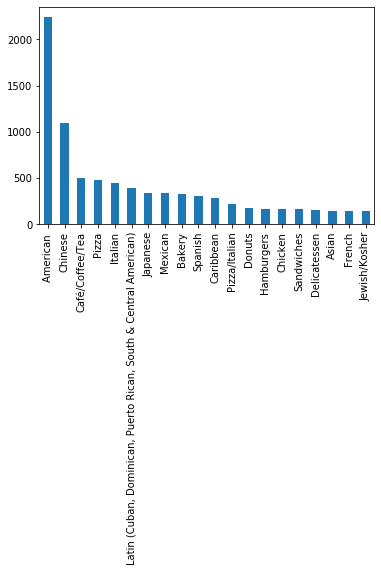

In [10]:
Restaurant_cusine_all = df.drop_duplicates(subset = ['RESTAURANT', 'CUISINE DESCRIPTION'])[
                                            'CUISINE DESCRIPTION'].value_counts()
Restaurant_cusine_all[:20].plot(kind = "bar")

# Note: There are 3 restaurants which are listed for 2 cuisines while other restaurant cuisine mapping is 1:1

#### Task 9: Plot the cuisines among restaurants which never got cited for violations. 
Ideally, you should explore and see what happens when there is no violation, but here I will just tell you: the ’VIOLATION CODE’ field is missing.
First, find the restaurants that were never cited for a code violation. The compute the popularity of each cuisine among these “clean” restaurants. Plot the popularity of the top-20 among these cuisines.

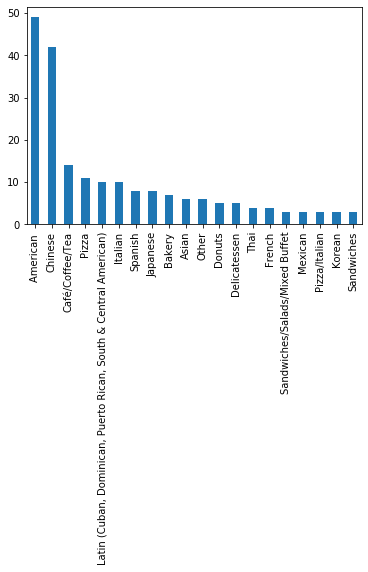

In [11]:
mask = ~  df['RESTAURANT'].isin(df[df['VIOLATION CODE'].notnull()]['RESTAURANT'])

# Selecting all the restaurants who have atleast one violation

Restaurant_cusine_no_violation=df[mask][['RESTAURANT','CUISINE DESCRIPTION']].drop_duplicates()['CUISINE DESCRIPTION'].value_counts()

# Selecting all the restaurants who have atleast one violation

df[mask][['RESTAURANT','CUISINE DESCRIPTION']].drop_duplicates()['CUISINE DESCRIPTION'].value_counts()[:20].plot.bar()

#### Task 10: What cuisines tend to be the “cleanest”?
Select all cuisines for which there were at least 20 restaurants repre- senting that cuisine.
For each such cuisine, compute the ratio of the counts in Q9 to Q8. This is the ratio of restaurants that never got cited, versus total number of restaurants, for each cuisine.
Find the top-10 cuisines with the highest ratios; these are that cuisines whose restaurants are “most likely to be clean.”


In [12]:
# Getting the list of cusinines where there are atleast 20 restaurants
Restaurant_cusine_all_20 = Restaurant_cusine_all[Restaurant_cusine_all.values > 20]

# Dividing to get the ratio
clean_cuisine_propotion = Restaurant_cusine_no_violation/Restaurant_cusine_all_20
clean_cuisine_propotion[clean_cuisine_propotion.notnull()].sort_values(ascending = False)[0:10]

Soul Food                        0.090909
Vietnamese/Cambodian/Malaysia    0.062500
Other                            0.058252
Soups & Sandwiches               0.047619
Continental                      0.047619
Barbecue                         0.047619
Asian                            0.041096
Chinese                          0.038251
Greek                            0.036364
Peruvian                         0.035714
Name: CUISINE DESCRIPTION, dtype: float64

#### Task 11: What are the most common violations in each borough? 
Create a table of the number of times each violation description was observed in each borough, and figure out the most common violation description for each borough.
To create the table, check out the crosstab function. We will see a more general version of this when we discuss groupby in class.
Once you do have the table, you will still need to find the most common violation description for each borough.

In [13]:
import numpy as np
df_violation_desc_removed = df.replace('Missing',np.nan)[df['VIOLATION DESCRIPTION'].notnull()]

In [14]:
# Dropping all those rows having Missing as a value for borough
df_violation_desc_removed = df_violation_desc_removed.drop(df[df.BORO == 'Missing'].index)

# Applying crosstab to calculate different violation descriptions across different borough
violation_description_df = pd.crosstab(df_violation_desc_removed['BORO'], 
                                       df_violation_desc_removed['VIOLATION DESCRIPTION'], 
                                       rownames=['BORO'], colnames=['VIOLATION DESCRIPTION'])
display(violation_description_df)

# Finding out the violation description most prevalant in each borough
maxValueIndex = violation_description_df.idxmax(axis = 1)
 
print("Max values of row are at following columns :")
print(maxValueIndex)

VIOLATION DESCRIPTION,"Choking first aid poster not posted. Alcohol and pregnancy warning sign not posted. Resuscitation equipment: exhaled air resuscitation masks (adult & pediatric), latex gloves, sign not posted. Inspection report sign not posted.",''''No Smoking and/or 'Smoking Permitted sign not conspicuously posted. Health warning not present on 'Smoking Permitted,''''Wash hands sign not posted at hand wash facility.,"A food containing artificial trans fat, with 0.5 grams or more of trans fat per serving, is being stored, distributed, held for service, used in preparation of a menu item, or served.",Accurate thermometer not provided in refrigerated or hot holding equipment.,"Appropriately scaled metal stem-type thermometer or thermocouple not provided or used to evaluate temperatures of potentially hazardous foods during cooking, cooling, reheating and holding.",Ashtray present in smoke-free area.,"Bulb not shielded or shatterproof, in areas where there is extreme heat, temperature changes, or where accidental contact may occur.","Caloric content not posted on menus, menu boards or food tags, in a food service establishment that is 1 of 15 or more outlets operating the same type of business nationally under common ownership or control, or as a franchise or doing business under the same name, for each menu item that is served in portions, the size and content of which are standardized.","Caloric content range (minimum to maximum) not posted on menus and or menu boards for each flavor, variety and size of each menu item that is offered for sale in different flavors, varieties and sizes.",...,"Smoke free workplace smoking policy inadequate, not posted, not provided to employees.",Thawing procedures improper.,"The original nutritional fact labels and/or ingredient label for a cooking oil, shortening or margarine or food item sold in bulk, or acceptable manufacturers documentation not maintained on site.","Tobacco use, eating, or drinking from open container in food preparation, food storage or dishwashing area observed.","Toilet facility not maintained and provided with toilet paper, waste receptacle and self-closing door.",Toilet facility not provided for employees or for patrons when required.,Toilet facility used by women does not have at least one covered garbage receptacle.,"Toxic chemical improperly labeled, stored or used such that food contamination may occur.",Unprotected food re-served.,Wiping cloths soiled or not stored in sanitizing solution.
BORO,,,,,,,,,,,,,,,,,,,,,
BRONX,12,1,21,5,21,27,4,20,0,0,...,45,36,48,22,46,2,1,2,1,47
BROOKLYN,40,5,57,12,76,120,4,93,4,0,...,222,109,125,55,142,3,5,8,0,198
MANHATTAN,49,6,93,19,98,162,5,168,6,0,...,264,151,198,107,225,11,7,15,1,285
QUEENS,29,4,60,24,92,85,8,80,5,1,...,154,100,151,64,134,3,2,20,0,168
STATEN ISLAND,5,1,8,3,16,17,1,10,1,0,...,22,23,25,7,14,1,1,3,0,25


Max values of row are at following columns :
BORO
BRONX            Non-food contact surface improperly constructe...
BROOKLYN         Non-food contact surface improperly constructe...
MANHATTAN        Non-food contact surface improperly constructe...
QUEENS           Non-food contact surface improperly constructe...
STATEN ISLAND    Non-food contact surface improperly constructe...
dtype: object


#### Task 12: What are the most common violations per borough, after normalizing for the relative abundance of each violation? 

Hopefully, the answer to the previous question left you unsatisfied, because some violations are just very common, irrespective of borough. A better approach would be to normalize the violation counts, as follows.

• Get overall frequencies: Figure out how common each violation is, over the entire dataset; let’s call this violationFrequency.

• Normalize: Consider the table of number of violations by boro that you created for the previous question. For each borough, divide the number of violations of each type by the total number of violations for that type; i.e., divide the series of violations by violationFrequency. We want to do this for each borough.

• Find the biggest violations: Now, after this normalization, for each borough, figure out the most common violation description.

In [15]:
# Making a new row containing the total count of violation description across all boroughs
violation_description_df.loc['violationFrequency'] = violation_description_df.sum(numeric_only=True, axis=0)

# Normalizing count across all violations in each borough
violation_description_df.loc[:,'\x1aChoking first aid\x1a poster not posted. \x1aAlcohol and pregnancy\x1a warning sign not posted. Resuscitation equipment: exhaled air resuscitation masks (adult & pediatric), latex gloves, sign not posted. Inspection report sign not posted.':] = violation_description_df.loc[:,'\x1aChoking first aid\x1a poster not posted. \x1aAlcohol and pregnancy\x1a warning sign not posted. Resuscitation equipment: exhaled air resuscitation masks (adult & pediatric), latex gloves, sign not posted. Inspection report sign not posted.':]/violation_description_df.iloc[-1]['\x1aChoking first aid\x1a poster not posted. \x1aAlcohol and pregnancy\x1a warning sign not posted. Resuscitation equipment: exhaled air resuscitation masks (adult & pediatric), latex gloves, sign not posted. Inspection report sign not posted.':]
display(violation_description_df)

# Finding out the violation description most prevalant in each borough after normalization
maxValueIndex = violation_description_df.idxmax(axis = 1)
 
print("Max values of row are at following columns :")
print(maxValueIndex)

VIOLATION DESCRIPTION,"Choking first aid poster not posted. Alcohol and pregnancy warning sign not posted. Resuscitation equipment: exhaled air resuscitation masks (adult & pediatric), latex gloves, sign not posted. Inspection report sign not posted.",''''No Smoking and/or 'Smoking Permitted sign not conspicuously posted. Health warning not present on 'Smoking Permitted,''''Wash hands sign not posted at hand wash facility.,"A food containing artificial trans fat, with 0.5 grams or more of trans fat per serving, is being stored, distributed, held for service, used in preparation of a menu item, or served.",Accurate thermometer not provided in refrigerated or hot holding equipment.,"Appropriately scaled metal stem-type thermometer or thermocouple not provided or used to evaluate temperatures of potentially hazardous foods during cooking, cooling, reheating and holding.",Ashtray present in smoke-free area.,"Bulb not shielded or shatterproof, in areas where there is extreme heat, temperature changes, or where accidental contact may occur.","Caloric content not posted on menus, menu boards or food tags, in a food service establishment that is 1 of 15 or more outlets operating the same type of business nationally under common ownership or control, or as a franchise or doing business under the same name, for each menu item that is served in portions, the size and content of which are standardized.","Caloric content range (minimum to maximum) not posted on menus and or menu boards for each flavor, variety and size of each menu item that is offered for sale in different flavors, varieties and sizes.",...,"Smoke free workplace smoking policy inadequate, not posted, not provided to employees.",Thawing procedures improper.,"The original nutritional fact labels and/or ingredient label for a cooking oil, shortening or margarine or food item sold in bulk, or acceptable manufacturers documentation not maintained on site.","Tobacco use, eating, or drinking from open container in food preparation, food storage or dishwashing area observed.","Toilet facility not maintained and provided with toilet paper, waste receptacle and self-closing door.",Toilet facility not provided for employees or for patrons when required.,Toilet facility used by women does not have at least one covered garbage receptacle.,"Toxic chemical improperly labeled, stored or used such that food contamination may occur.",Unprotected food re-served.,Wiping cloths soiled or not stored in sanitizing solution.
BORO,,,,,,,,,,,,,,,,,,,,,
BRONX,0.088889,0.058824,0.087866,0.079365,0.069307,0.065693,0.181818,0.053908,0.0000,0.0,...,0.063649,0.085919,0.087751,0.086275,0.081996,0.10,0.0625,0.041667,0.5,0.065007
BROOKLYN,0.296296,0.294118,0.238494,0.190476,0.250825,0.291971,0.181818,0.250674,0.2500,0.0,...,0.314003,0.260143,0.228519,0.215686,0.253119,0.15,0.3125,0.166667,0.0,0.273859
MANHATTAN,0.362963,0.352941,0.389121,0.301587,0.323432,0.394161,0.227273,0.452830,0.3750,0.0,...,0.373409,0.360382,0.361974,0.419608,0.401070,0.55,0.4375,0.312500,0.5,0.394191
QUEENS,0.214815,0.235294,0.251046,0.380952,0.303630,0.206813,0.363636,0.215633,0.3125,1.0,...,0.217822,0.238663,0.276051,0.250980,0.238859,0.15,0.1250,0.416667,0.0,0.232365
STATEN ISLAND,0.037037,0.058824,0.033473,0.047619,0.052805,0.041363,0.045455,0.026954,0.0625,0.0,...,0.031117,0.054893,0.045704,0.027451,0.024955,0.05,0.0625,0.062500,0.0,0.034578
violationFrequency,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00,1.0000,1.000000,1.0,1.000000


Max values of row are at following columns :
BORO
BRONX                                       Unprotected food re-served.
BROOKLYN              Precooked potentially hazardous food from comm...
MANHATTAN             Out-of package sale of tobacco products observed.
QUEENS                Caloric content range (minimum to maximum) not...
STATEN ISLAND         Eggs found dirty/cracked; liquid, frozen or po...
violationFrequency    Choking first aid poster not posted. Alcoho...
dtype: object


#### Task 13: How many phone area codes correspond to a single zipcode? 
The first three digits of the restaurant phone numbers are their area codes. The area codes do not generally align with zip codes, but some area codes are only for a single zip code. You must figure out how many area codes have this property.
• To extract the first 3 characters of the phone number, recall that strings are pretty similar to lists.

In [16]:
# Extracting first 3 digits
df['AREACODE'] = df['PHONE'].str.extract(r'(\d{1,3})') 

# Checking if a particular AREA CODE is mapped only to one ZIPCODE
sum(df[['AREACODE','ZIPCODE']].drop_duplicates()['AREACODE'].value_counts()==1) 

34

#### Task 14: Find common misspellings of street names 
Sometimes, it’s Avenue, and sometimes, it’s Ave. We will try to come up with an automated way to find common misspellings. The idea is the following: if Ave and Avenue are the same, they should show up often in similar-sounding street names, e.g., Lexington Ave and Lexington Avenue.

• Create a new column, called STREET TYPE, which is the the last word in the name of the street. For example, if the street is “Astoria Boule- vard”, the street type should be “Boulevard”.

• Create another column, called STREET BASE, which contains everything but the last word in the name of the street. For example, if the street is “Astoria Boulevard”, the street base should be “Astoria”.

• Create a third column, called STREET BASE & ZIP, that combines the street base and the zipcode.

• Create a table containing just these three columns, and remove any duplicates or instances where street base is empty. This table now contains unique street names, along with the street type.

• Merge this table with itself, on the STREET BASE & ZIP column. Thus, in the new merged tabled, we will have two STREET TYPE fields for each street base and zipcode. For example, if both Lexington Ave and Lexington Avenue exist in the same zipcode, we will get a row for the street base Lexington and the two street types Ave and Avenue.

• From the merged table, select only the rows where the street types are different.

• Now, do a cross-tabulation of the two distinct street types (check out the crosstab function in Pandas). This gives us the number of times Ave and Avenue were used with the same STREET BASE & ZIP.

• From this cross-tabulation table, find the most commonly street type that occurs with each of the following: AVE, ST, RD, PL, BOULEARD, and BULEVARD.

In [17]:
df['STREET TYPE'] = df['STREET'].str.split(" ").str[-1]
df['STREET BASE'] = df['STREET'].str.split(" ").str[0:-1].apply(' '.join)
df['STREET BASE & ZIP'] = df['STREET BASE'] + " " + df['ZIPCODE']

df3 = df [['STREET TYPE', 'STREET BASE', 'STREET BASE & ZIP']]
df3 = df3.replace('', np.nan)
df3 = df3[df3['STREET BASE'].notnull()]
df3 =  df3.drop_duplicates(subset = ['STREET TYPE','STREET BASE', 'STREET BASE & ZIP'])

df4 = df3.merge(df3, left_on = ['STREET BASE & ZIP', 'STREET BASE'],
                                                      right_on = ['STREET BASE & ZIP', 'STREET BASE'])

diff = df4[df4['STREET TYPE_x'] != df4['STREET TYPE_y']]
ct = pd.crosstab(diff['STREET TYPE_x'],diff['STREET TYPE_y'])

street_type = ['AVE', 'ST', 'RD', 'PL', 'BOULEARD', 'BULEVARD']
for i in street_type:
    print([i, ct[i].idxmax()])

[('AVE', 'AVENUE'),
 ('ST', 'STREET'),
 ('RD', 'ROAD'),
 ('PL', 'PLACE'),
 ('BLVD', 'BOULEARD'),
 ('BLVD', 'BULEVARD')]